# `PySAL` logo tutorial/palette examples
#### James Gaboardi, 12/2019 <jgaboardi@gmail.com>

In [1]:
import create_pysal_logo
print(create_pysal_logo.__doc__)


Description:
    Create the PySAL logo with TeX/TikZ, then create
    favicons at specified resolutions with ImageTricks.
    The original logo design was based on Figure 1 from Rey and Anselin (2007)
    and can be created by simply running `python create_pysal_logo.py` from
    the command line (assuming all requirements are installed). More detailed 
    examples are given within `create_pysal_logo()` and `create_favicon()`.
    Further examples can be found in `logo_palette.ipynb`.
    
    Rey, S. J. and Anselin, L. (2007). PySAL: A python library of
        spatial analytical methods. The Review of Regional Studies, 37(1):5–27.

Requirements:
    Python 3.6+ (numpy)
    LuaTeX, Version 1.10.0 (TeX Live 2019)
    M+ fonts
        info -- https://mplus-fonts.osdn.jp/about-en.html
        download -- https://osdn.net/projects/mplus-fonts/releases/<RELEASE>
            The files created with the initial push for this file were run
            on release <62344>. The current release 

In [2]:
import matplotlib
import numpy
%load_ext watermark
%watermark

2019-12-21T14:25:06-05:00

CPython 3.7.3
IPython 7.10.2

compiler   : Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.2.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [3]:
%watermark -iv

numpy             1.17.3
matplotlib        3.1.2
create_pysal_logo 0.0.1



In [4]:
from create_pysal_logo import create_logo, OUT_FILE
from create_pysal_logo import ORIGINAL_THEME, VARIATION_THEME

import matplotlib.pyplot as plt 
import matplotlib.image as img
%matplotlib inline

alphas = numpy.linspace(0, 100, len(ORIGINAL_THEME))
logo_file = OUT_FILE + ".png"

-----------------

# `ORIGINAL` & `VARIATION` themes

In [5]:
# reproduction of the color scheme found in Rey and Anselin (2007)
create_logo(OUT_FILE, ORIGINAL_THEME)
original_theme_image = img.imread(logo_file)

In [6]:
# variation on the original color scheme with suggestions from @knaaptime
create_logo(OUT_FILE, VARIATION_THEME)
variation_theme_image = img.imread(logo_file)

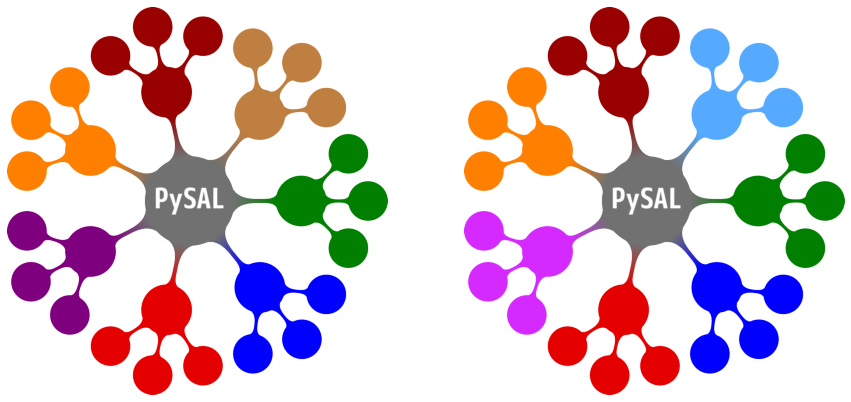

In [7]:
rows = 1
cols = [original_theme_image, variation_theme_image]
fig, *axs = plt.subplots(rows, len(cols), figsize=(15, 15))
for i in range(rows):
    for j, _img in enumerate(cols):
        axs[i][j].imshow(_img, interpolation="bilinear")
        axs[i][j].axis("off");

--------------------------

# `ORIGINAL` theme with sample text

In [8]:
from create_pysal_logo import ORIG_COLORS, GREEK

In [9]:
# original color scheme with bullets in child nodes
bullets = [r"$\bullet$"] * len(ORIG_COLORS)
bullet_theme = numpy.array(list(zip(ORIG_COLORS, bullets)))
create_logo(OUT_FILE, bullet_theme)
bullets_theme_image = img.imread(logo_file)

In [10]:
# original color scheme with Greek lettering in child nodes
greek_theme = numpy.array(list(zip(ORIG_COLORS, GREEK)))
create_logo(OUT_FILE, greek_theme)
greek_theme_image = img.imread(logo_file)

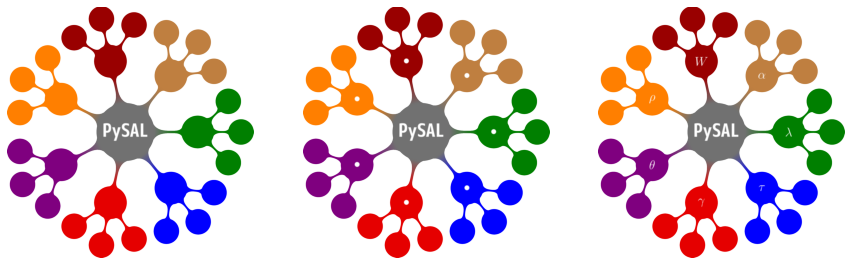

In [11]:
rows = 1
cols = [original_theme_image, bullets_theme_image, greek_theme_image]
fig, *axs = plt.subplots(rows, len(cols), figsize=(15, 15))
for i in range(rows):
    for j, _img in enumerate(cols):
        axs[i][j].imshow(_img, interpolation="bilinear")
        axs[i][j].axis("off");

-------------------

# `VARIATION` theme with sample text

In [12]:
from create_pysal_logo import VARIATION_COLORS

In [13]:
# variation colors with bullets
bullets = [r"$\bullet$"] * len(VARIATION_COLORS)
bullet_theme = numpy.array(list(zip(VARIATION_COLORS, bullets)))
create_logo(OUT_FILE, bullet_theme)
bullets_theme_image = img.imread(logo_file)

In [14]:
# variation colors with greek lettering
greek_theme = numpy.array(list(zip(VARIATION_COLORS, GREEK)))
create_logo(OUT_FILE, greek_theme)
greek_theme_image = img.imread(logo_file)

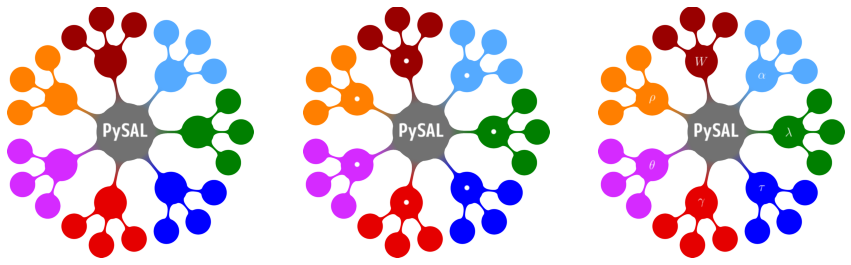

In [15]:
rows = 1
cols = [variation_theme_image, bullets_theme_image, greek_theme_image]
fig, *axs = plt.subplots(rows, len(cols), figsize=(15, 15))
for i in range(rows):
    for j, _img in enumerate(cols):
        axs[i][j].imshow(_img, interpolation="bilinear")
        axs[i][j].axis("off");

---------------------

# Demonstrating shading

In [16]:
from create_pysal_logo import ORIG_TEXT

In [17]:
theme_images = []
blend_bases = [
    "cyan!%s!black", "black!%s!cyan", "blue!%s!black", "black!%s!blue"
]
for idx, bases in enumerate(blend_bases):
    blends = [bases % alpha for alpha in alphas]
    if not idx % 2:
        blends = blends[-4:] + blends[:3]
    else:
        blends = blends[::-1]
    theme = numpy.array(list(zip(blends, ORIG_TEXT)))
    create_logo(OUT_FILE, theme)
    theme_images.append(img.imread(logo_file))

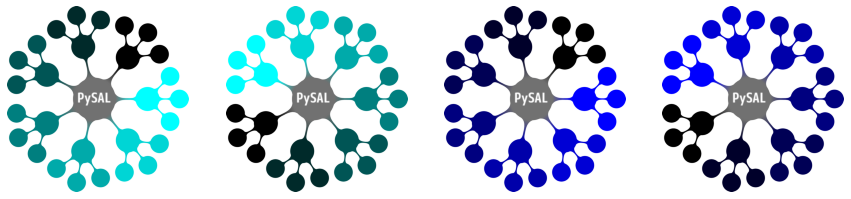

In [18]:
rows = 1
cols = theme_images
fig, *axs = plt.subplots(rows, len(cols), figsize=(15, 15))
for i in range(rows):
    for j, _img in enumerate(cols):
        axs[i][j].imshow(_img, interpolation="bilinear")
        axs[i][j].axis("off");

-------------------

# Demonstrating blending

In [19]:
theme_images = []
blend_bases = [
    "blue!%s!brown",
    "olive!%s!teal",
    "black!20!cyan!%s!blue",
    "black!20!pink!%s!violet"
]
for bases in blend_bases:
    blends = [bases % alpha for alpha in alphas]
    theme = numpy.array(list(zip(blends, ORIG_TEXT)))
    create_logo(OUT_FILE, theme)
    theme_images.append(img.imread(logo_file))

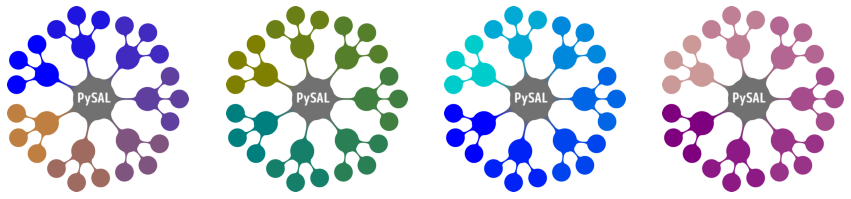

In [20]:
rows = 1
cols = theme_images
fig, *axs = plt.subplots(rows, len(cols), figsize=(15, 15))
for i in range(rows):
    for j, _img in enumerate(cols):
        axs[i][j].imshow(_img, interpolation="bilinear")
        axs[i][j].axis("off");

----------------------------

# 7x7 counter-clockwise tiling

In [21]:
n_colors = len(ORIG_COLORS)
color_array = numpy.empty([n_colors, n_colors], dtype=list)

In [22]:
rows = color_array.shape[0]
cols = color_array.shape[1]
for i in range(rows):
    for j in range(cols):
        color_array[i,j] = ORIG_COLORS[i-j:] + ORIG_COLORS[:i-j]

In [23]:
image_array = []
for i in range(rows):
    image_array.append([])
    for j in range(cols):
        theme = numpy.array(list(zip(color_array[i,j], ORIG_TEXT)))
        # create logo files
        create_logo(OUT_FILE, theme)
        image_array[i].append(img.imread(logo_file))

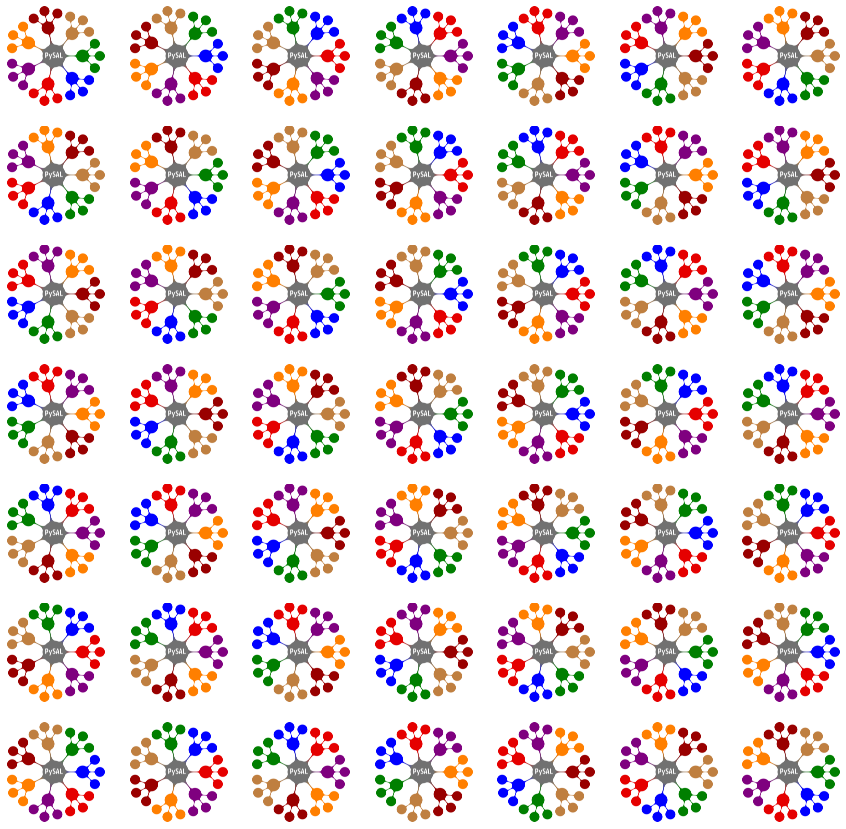

In [24]:
fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
for i in range(rows):
    for j in range(cols):
        axs[i,j].imshow(image_array[i][j], interpolation="bilinear")
        axs[i,j].axis("off");

------------------------------------------